In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [1]:
import pandas as pd

data = pd.read_csv('/content/gdrive/MyDrive/BigDataAnalaysis/도로교통공단_시도 시군구별 교통사고 통계_20211231.csv',encoding='euc-kr')
display(data.tail(10))

,시도,시군구,사고건수,사망자수,중상자수,경상자수,부상신고자수
219,대전,중구,1052,14,242,1222,44
220,대전,서구,2162,13,461,2494,62
221,대전,유성구,1905,16,366,2442,97
222,대전,대덕구,862,6,233,983,33
223,울산,중구,624,8,224,565,60
224,울산,남구,1193,14,342,1143,101
225,울산,동구,467,2,151,456,3
226,울산,북구,786,8,251,789,109
227,울산,울주군,731,18,271,693,80
228,세종,세종시,788,16,278,714,39


/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44148 (\N{HANGUL SYLLABLE GEON}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  func(*args

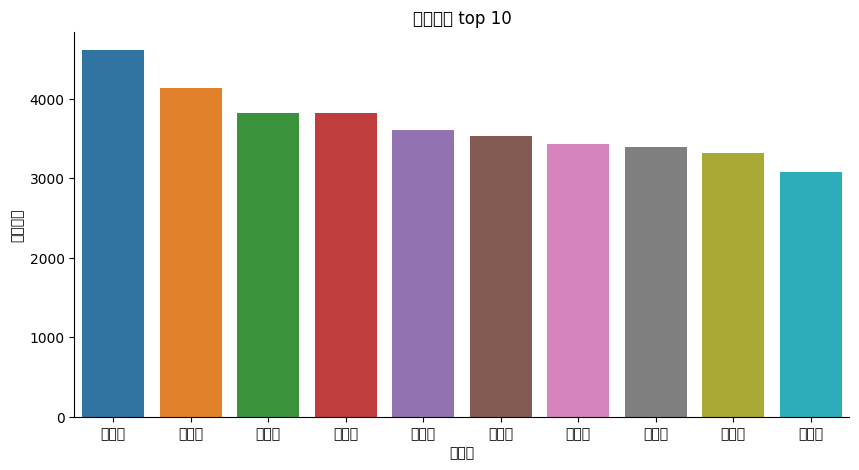

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt


# Set up the matplotlib figure
f, ax1 = plt.subplots(figsize=(10, 5))

data_ac = data.sort_values(['사고건수'],ascending=False)[0:10]

sns.barplot(data=data_ac,x='시군구',y='사고건수')

ax1.set_title('사고건수 top 10')
sns.despine()

In [5]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

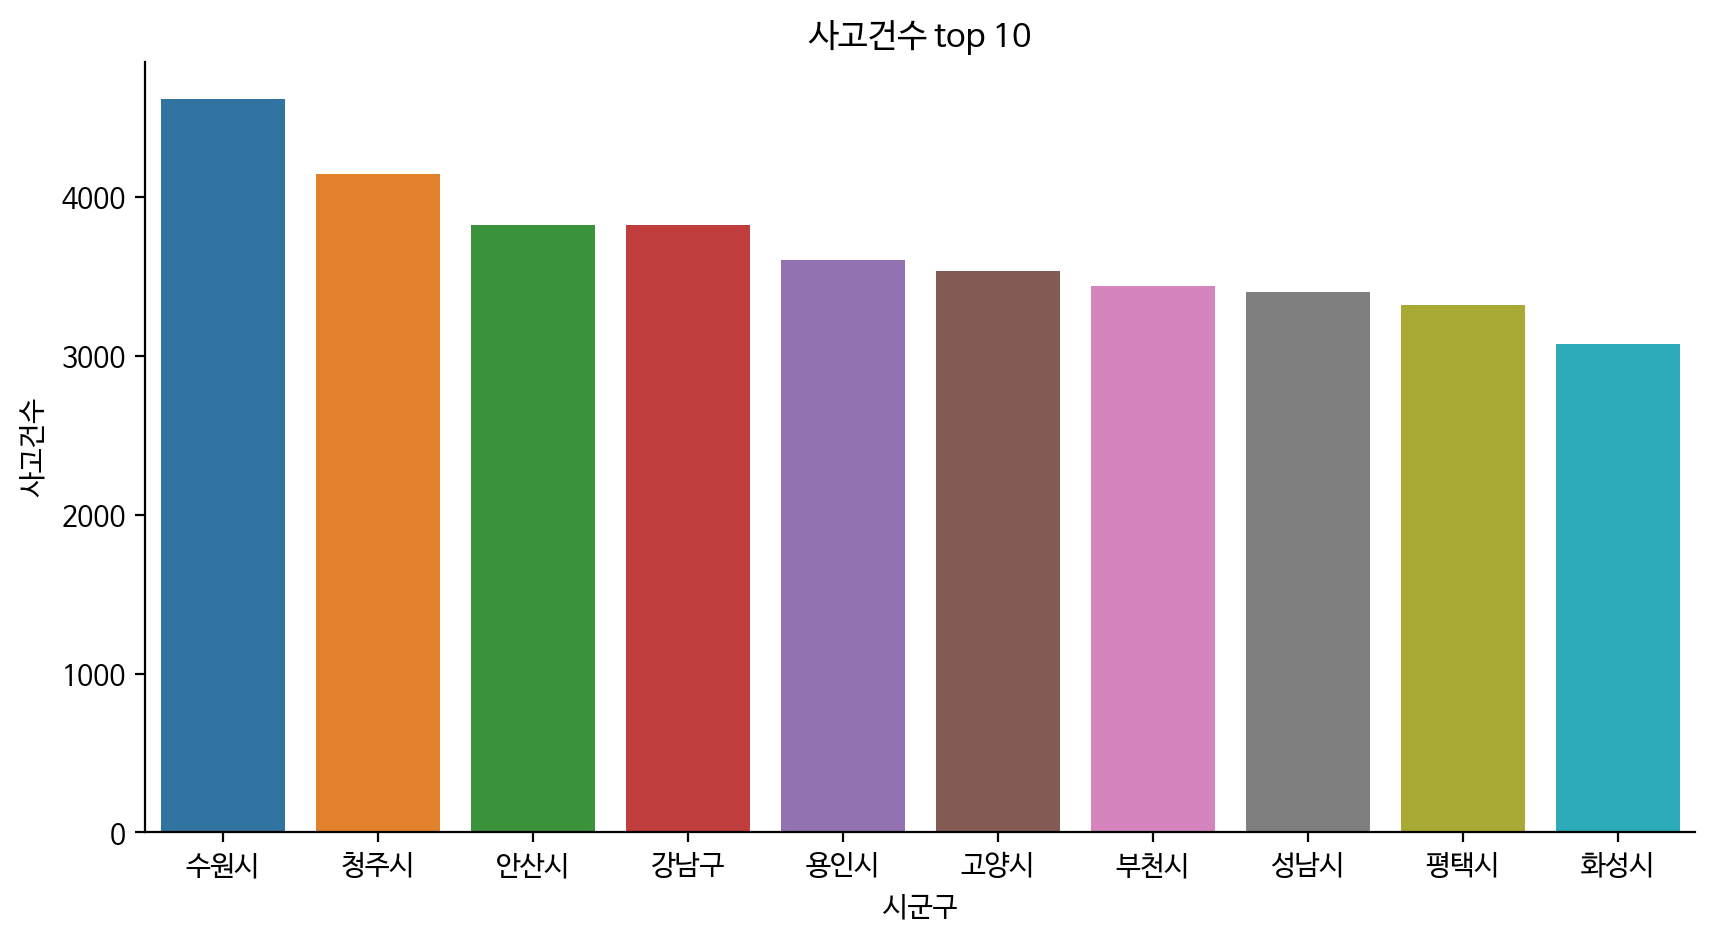

In [6]:
import matplotlib as mpl
import matplotlib.font_manager as fm

import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

# Set up the matplotlib figure
f, ax1 = plt.subplots(figsize=(10, 5))

data_ac = data.sort_values(by=['사고건수'], ascending=False)[0:10]

sns.barplot(data=data_ac, x='시군구', y='사고건수')

ax1.set_title('사고건수 top 10')
sns.despine()

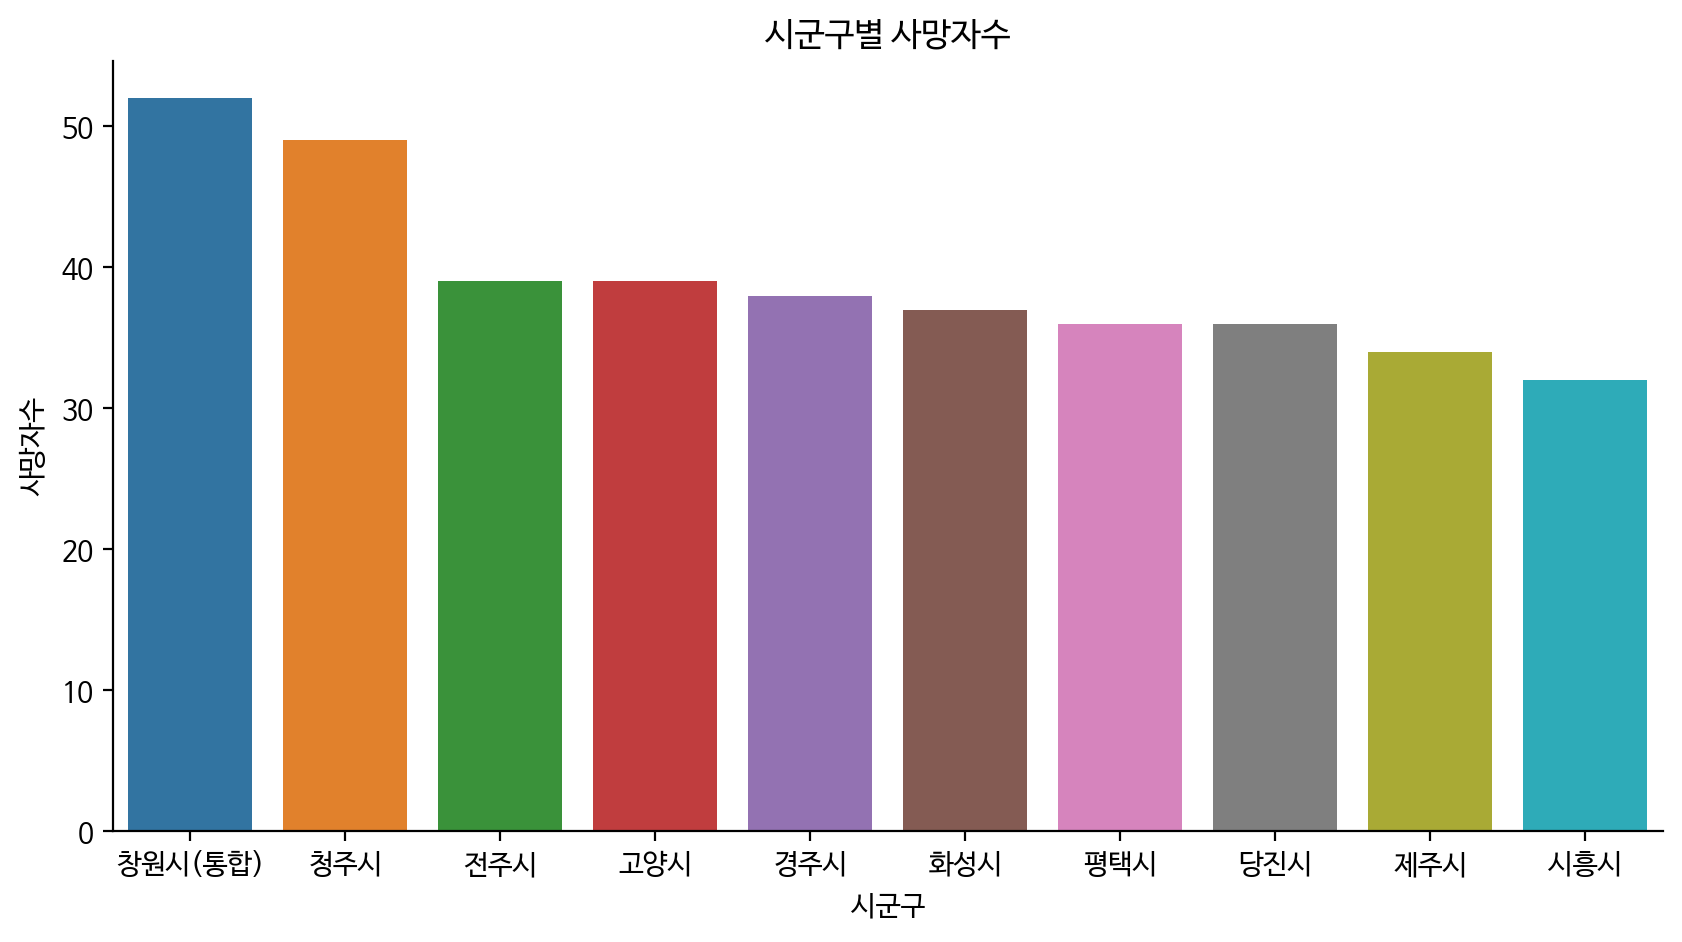

In [12]:
f, ax1 = plt.subplots(figsize=(10,5))

data_death_ac = data.sort_values(by=['사망자수'], ascending=False)[0:10]
sns.barplot(data=data_death_ac, x='시군구', y='사망자수')

ax1.set_title('시군구별 사망자수')
sns.despine()

In [13]:
data_ac['부상자수'] = data_ac['중상자수']+data_ac['경상자수']
display(data_ac)

,시도,시군구,사고건수,사망자수,중상자수,경상자수,부상신고자수,부상자수
41,경기,수원시,4615,25,968,5191,508,6159
90,충북,청주시,4141,49,1204,4828,160,6032
46,경기,안산시,3821,20,929,4310,286,5239
15,서울,강남구,3820,10,676,4192,307,4868
62,경기,용인시,3603,31,791,4072,538,4863
55,경기,고양시,3532,39,887,3829,285,4716
45,경기,부천시,3436,19,743,3700,212,4443
42,경기,성남시,3398,27,829,3509,413,4338
47,경기,평택시,3321,36,775,3779,497,4554
52,경기,화성시,3075,37,796,3536,216,4332


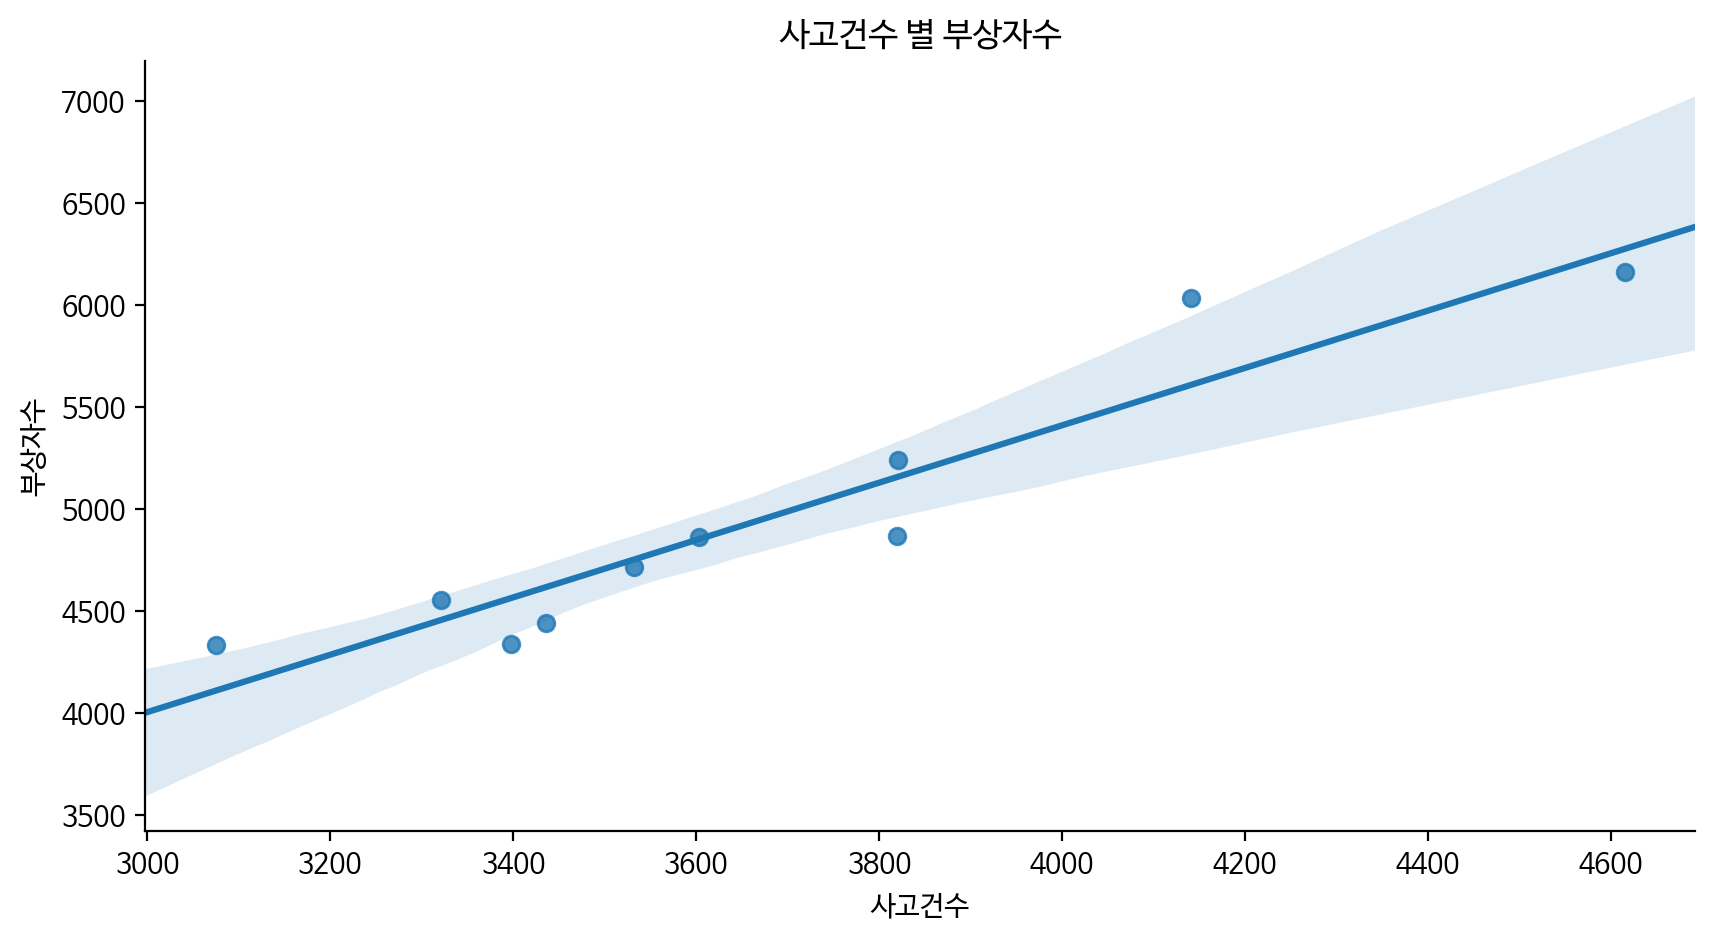

In [22]:
f, ax1 = plt.subplots(figsize=(10,5))
sns.regplot(x=data_ac['사고건수'],y=data_ac['부상자수'],truncate=False)

ax1.set_title('사고건수 별 부상자수')
sns.despine()

In [23]:
data_bc = data.groupby(['시도'],as_index=False).sum()
data_cc = data_bc.sort_values(['사망자수'],ascending=False)[0:5]
data_cc

,시도,사고건수,사망자수,중상자수,경상자수,부상신고자수
1,경기,53332,537,12944,59912,5369
3,경북,12100,334,4273,12620,797
15,충남,8423,265,2911,8850,436
2,경남,11059,257,4634,9994,786
12,전남,8685,255,2467,10671,384


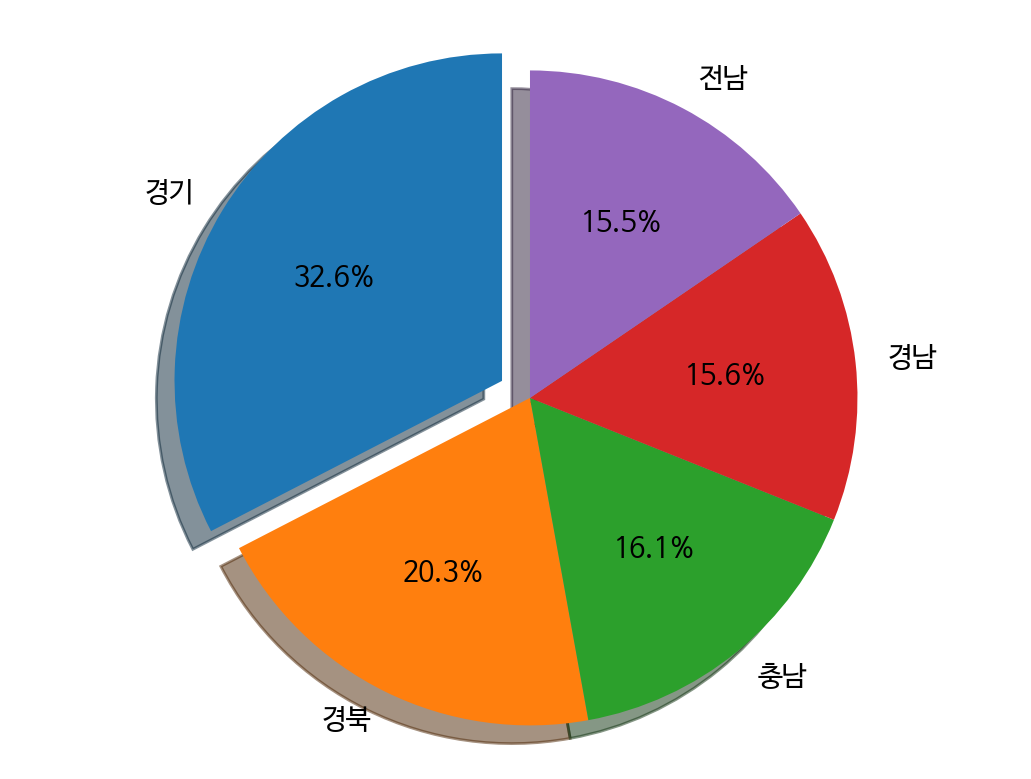

In [25]:
data_labels = data_cc['시도']
data_sizes = data_cc['사망자수']

explode = (0.1, 0, 0, 0, 0)  # only "explode" the 1nd slice

plt.pie(data_sizes, labels=data_labels, explode=explode, autopct='%.1f%%',shadow=True, startangle=90)
plt.axis('equal')
plt.show()

In [27]:
data = pd.read_csv('/content/gdrive/MyDrive/BigDataAnalaysis/도로교통공단_사망 교통사고 정보_20211231.csv', encoding='euc-kr')

data_db = data[data['발생지시군구']=='청주시']

data_type = data_db['사고유형']

data_lot = data_db['경도'].astype(float)
data_lat = data_db['위도'].astype(float)


In [28]:
print('청주시 사망교통사고 건수: {0}'.format(len(data_type.index)))
print('\n')

청주시 사망교통사고 건수: 49




In [29]:
print(data_type.head(10))
print('\n')

105      추돌
115      추돌
237      기타
371      추돌
453     횡단중
486      기타
518      기타
525    측면충돌
557    측면충돌
602      기타
Name: 사고유형, dtype: object




In [30]:
for i in range(0, 10) :
    print('{0} - {1} : {2}'.format(data_type.iloc[i], data_lot.iloc[i], data_lat.iloc[i]))

추돌 - 127.4527293 : 36.56125697
추돌 - 127.5366674 : 36.51798808
기타 - 127.4821265 : 36.62926548
추돌 - 127.4278084 : 36.5738025
횡단중 - 127.4748406 : 36.65696627
기타 - 127.4967792 : 36.61836764
기타 - 127.6892062 : 36.66226458
측면충돌 - 127.499594 : 36.63223906
측면충돌 - 127.4577052 : 36.55589485
기타 - 127.4344533 : 36.63295395


In [31]:
import folium

# 청주 시청
map_osm = folium.Map(location=[36.62926548,127.4344444],zoom_start=13)

for i in range(0, len(data_type.index)) :
  location = [data_lat.iloc[i], data_lot.iloc[i]]
  folium.Marker(location, popup=data_type.iloc[i],icon=folium.Icon(icon='glyphicon glypicon-remove-sign')).add_to(map_osm)

map_osm
#map_osm.save(‘/content/gdrive/My Drive/Python/map.html’)